# Toyata Cars Data

## Importing Requrid Libraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Data set

In [2]:
data = pd.read_csv("E:\DSP 17\pratice paper\\toyata.txt", na_values = ("??", "????"), index_col = 0 )
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


### Dataset Description:
Price : Price of the Car(Dependent Varible)

Age : Age of the Car.

KM : Car runnig distance in KiloMeters.

Fueltype : Which type fuel used in car like Petrol, CNG, Diesel.

HP : Horsepower of the car.

Metcolor : Color Type of the car.

Automatic : Car gear system automatic(0: Manullay, 1: Automatic).

CC : cubic centimetres, car engine size describe.

Doors : No.of Doors of the Car.

Weight : Weight of the car.

In [3]:
data.shape

(1436, 10)

### Observation Point :
1) In the data set 1436 rows 10 features.

2) Age, KM, Fueltype, Metcolor and HP features are having some null values.

3) In the Doors feature numeric and character data types present.

4) Dependent feature(PRICE), it's continuous data so we apply to Regression problem.

## EDA Process

## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


### Observation Point:
1) we could see that the features and its data type, along with Null count

2) Fueltype and Doors features are Object data type and remaining features are int64, float64 data type.

In [5]:
data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

### Observation Point:
1) Age = 100,

2) KM = 15,

3) Fueltype = 100,

4) Metcolor = 150,

5) HP = 6

Null values count of each feature.

In [6]:
print(data.Doors.unique())
print("Doors Feature Data type :", data.Doors.dtype)

['three' '3' '5' '4' 'four' 'five' '2']
Doors Feature Data type : object


In [7]:
data.Doors.value_counts()

5        673
3        621
4        137
2          2
three      1
five       1
four       1
Name: Doors, dtype: int64

### Observation Point:
1) In Doors features 'Object' dataype so convert into int datatype

2) In the unique values of Doors features "Four", "Five", Three" present.

3) It sense the numaric data present in character data, so converting to datatypes.

In [8]:
doors_map = {"2":2,"3":3,"4":4,"5":5, "three":3, "four":4,"five":5,}
data["Doors"] = data["Doors"].map(doors_map)

In [9]:
data.Doors.value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

#### Explaing Point:
1) It's clear to data types and converting to data type.

## Handaling Missing Values

In [10]:
data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [11]:
data.MetColor.value_counts()

1.0    868
0.0    418
Name: MetColor, dtype: int64

In [12]:
data.FuelType.value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [13]:
fueltype_map = {'Petrol' :2, 'Diesel' :1, 'CNG':3}
data["FuelType"] = data["FuelType"].map(fueltype_map)

In [14]:
data.FuelType.value_counts()

2.0    1177
1.0     144
3.0      15
Name: FuelType, dtype: int64

In [15]:
data['Age'] = data["Age"].fillna(data.Age.mean())
data["KM"] = data["KM"].fillna(data.KM.mean())
data["HP"] = data["HP"].fillna(data.HP.mean())
data["MetColor"] = data["MetColor"].fillna(data.MetColor.mode()[0])
data["FuelType"] = data["FuelType"].fillna(data.FuelType.mode()[0])

In [16]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.0,32500.0
Age,1436.0,55.672156,17.930380,1.0,44.00,59.0,68.0,80.0
KM,1436.0,68647.239972,37137.390678,1.0,43505.75,64000.0,86916.0,243000.0
FuelType,1436.0,1.910167,0.320509,1.0,2.00,2.0,2.0,3.0
HP,1436.0,101.478322,14.737348,69.0,90.00,110.0,110.0,192.0
MetColor,1436.0,0.708914,0.454421,0.0,0.00,1.0,1.0,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.0,1.0
CC,1436.0,1566.827994,187.182436,1300.0,1400.00,1600.0,1600.0,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.00,4.0,5.0,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.00,1070.0,1085.0,1615.0


In [18]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,1.0,90.0,1.0,0,2000,3,1165
1,13750,23.000000,72937.000000,1.0,90.0,1.0,0,2000,3,1165
2,13950,24.000000,41711.000000,1.0,90.0,1.0,0,2000,3,1165
3,14950,26.000000,48000.000000,1.0,90.0,0.0,0,2000,3,1165
4,13750,30.000000,38500.000000,1.0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,2.0,86.0,1.0,0,1300,3,1025
1432,10845,72.000000,68647.239972,2.0,86.0,0.0,0,1300,3,1015
1433,8500,55.672156,17016.000000,2.0,86.0,0.0,0,1300,3,1015
1434,7250,70.000000,68647.239972,2.0,86.0,1.0,0,1300,3,1015


## Data Splitting

In [19]:
X = data.drop("Price", axis = 1)
y = data.Price

In [20]:
print("X Shape :", X.shape)
print("y Shape :", y.shape)

X Shape : (1436, 9)
y Shape : (1436,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 12)

In [22]:
print("X_train Shape :", X_train.shape)
print("X_test Shape  :", X_test.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape  :", y_test.shape)

X_train Shape : (1005, 9)
X_test Shape  : (431, 9)
y_train Shape : (1005,)
y_test Shape  : (431,)


## Ordinary Least Squares regression (OLS) Model 

In [23]:
regressor_OLS = sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              9109.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:32:11   Log-Likelihood:                         -12522.
No. Observations:                1436   AIC:                                  2.506e+04
Df Residuals:                    1427   BIC:                                  2.511e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -123.9285      2.664    -46.525      0.000    -129.154    -118.703
KM            -0.0192      0.001    -13.435      0.000      -0.022      -0.016
FuelType   -1154.9006    210.468     -5.487      0.000   -1567.760    -742.041
HP            41.4164      4.078     10.157      0.000      33.418      49.415
MetColor      90.9203     86.974      1.045      0.296     -79.691     261.532
Automatic    238.8739    173.368      1.378      0.168    -101.210     578.958
CC            -2.4512      0.420     -5.833      0.000      -3.276      -1.627
Doors        -40.2631     43.371     -0.928      0.353    -125.340      44.814
Weight        19.4764      0.709     27.484      0.000      18.086      20.867
==============================================================================
Omnibus:                      286.289   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4999.795
Skew:                           0.413   Prob(JB):                         0.00
Kurtosis:                      12.104   Cond. No.                     4.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Model Buliding

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr_pred = lr_model.predict(X_test)

In [26]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,lr_pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

Mean Absolute Error          : 1050.1707518267015
Mean Squared Error           : 2408487.437566267
RMSE(Root Mean Squared Error): 1551.9302296064302


In [27]:
#calculating r-square
lr_model.score(X_test, y_test)

0.8152276813620751

In [28]:
print("Linear model coefficients :", lr_model.coef_)
print("Linear model intercept    :", lr_model.intercept_)

Linear model coefficients : [-1.10660185e+02 -2.02691209e-02  3.59853926e+02  2.71936294e+01
  9.78641680e+01 -1.73081287e+02 -2.09115511e+00 -8.41093816e+01
  3.04180928e+01]
Linear model intercept    : -14238.656718953476


In [29]:
r2_score(y_test, lr_pred)

0.8152276813620751

## Random Forest Model Buliding

In [30]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
rf_pred = rf_model.predict(X_test)

In [32]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,rf_pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Mean Absolute Error          : 930.6032482598606
Mean Squared Error           : 1723495.83062645
RMSE(Root Mean Squared Error): 1312.8198012775592


In [33]:
rf_score = rf_model.score(X_test, y_test)
rf_score

0.8677782927905002

In [34]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=12)

cross_val_score(RandomForestRegressor(), X, y, cv=cv)

array([0.86362923, 0.84012938, 0.8749265 , 0.87027759, 0.86127388])

## Hyperparameter Tunning

In [34]:
 #Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [35]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [38]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [39]:
rf_random.best_score_

-1935782.1074390493

In [40]:
pred = rf_random.predict(X_test)

In [41]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error          : 862.349851535742
Mean Squared Error           : 1437806.613644784
RMSE(Root Mean Squared Error): 1199.0857407394953


### Best parameters with random forest model

In [42]:
new_rf = RandomForestRegressor(n_estimators = 1000,min_samples_split = 2,
                               min_samples_leaf = 1,max_features = 'sqrt',max_depth = 25)
new_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
new_pred = new_rf.predict(X_test)


In [44]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,new_pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,new_pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,new_pred)))

Mean Absolute Error          : 860.4672933377527
Mean Squared Error           : 1421280.3908688987
RMSE(Root Mean Squared Error): 1192.1746478049677


In [45]:
new_rf_score = new_rf.score(X_test, y_test)
new_rf_score

0.8909634033545848

In [46]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=12)

cross_val_score(RandomForestRegressor(n_estimators = 1000,min_samples_split = 2,
                               min_samples_leaf = 1,max_features = 'sqrt',max_depth = 25), X, y, cv=cv)

array([0.89143593, 0.85638913, 0.88950957, 0.89113783, 0.87378256])

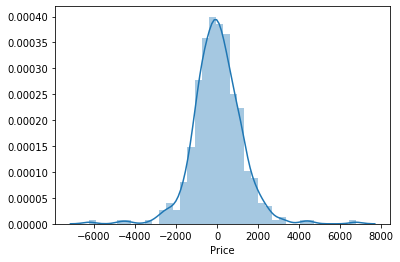

In [47]:
sns.distplot(y_test-pred)
plt.show()

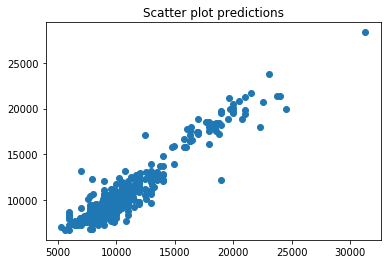

In [48]:
plt.scatter(y_test,pred)
plt.title("Scatter plot predictions")
plt.show()

### Feature Selection

In [68]:
features = data.columns
features

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
indices = model.feature_importances_
indices

array([0.29697912, 0.43838613, 0.00886052, 0.02482018, 0.02225136,
       0.0128904 , 0.0219444 , 0.0364805 , 0.13738737])

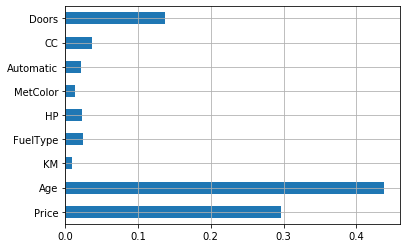

In [69]:

feat_importance = pd.Series(model.feature_importances_)
feat_importance.plot(kind = 'barh')
plt.yticks(range(len(indices)), features)
plt.grid()
plt.show()

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(new_rf, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.4s finished

[2021-04-26 13:13:23] Features: 1/5 -- score: -7446528.857956548[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.4s finished

[2021-04-26 13:14:15] Features: 2/5 -- score: -7412566.294705662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   47.9s finished

[2021-04-26 13:15:03] Features: 3/5 -- score: -7945928.030704966[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [81]:
feat_names1 = list(sfs1.k_feature_names_)
print(feat_names1)

['Age', 'KM', 'MetColor', 'Automatic', 'Doors']


In [82]:
#creating a new dataframe using the above variables and adding the target variable
new_data = data[feat_names1]
new_data['Price'] = data['Price']

# first five rows of the new data
new_data

,Age,KM,MetColor,Automatic,Doors,Price
0,23.000000,46986.000000,1.0,0,3,13500
1,23.000000,72937.000000,1.0,0,3,13750
2,24.000000,41711.000000,1.0,0,3,13950
3,26.000000,48000.000000,0.0,0,3,14950
4,30.000000,38500.000000,0.0,0,3,13750
...,...,...,...,...,...,...
1431,55.672156,20544.000000,1.0,0,3,7500
1432,72.000000,68647.239972,0.0,0,3,10845
1433,55.672156,17016.000000,0.0,0,3,8500
1434,70.000000,68647.239972,1.0,0,3,7250


In [83]:
x = new_data.drop("Price", axis = 1)
y = new_data.Price

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 12)

In [85]:
print("X_train Shape :", x_train.shape)
print("X_test Shape  :", x_test.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape  :", y_test.shape)

X_train Shape : (1005, 5)
X_test Shape  : (431, 5)
y_train Shape : (1005,)
y_test Shape  : (431,)


In [86]:
new_rf = RandomForestRegressor(n_estimators = 1000,min_samples_split = 2,
                               min_samples_leaf = 1,max_features = 'sqrt',max_depth = 25)
new_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
new_rf_pred = new_rf.predict(x_test)

In [88]:
score = new_rf.score(x_test, y_test)
score

0.79376438274878

In [89]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,new_pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,new_pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,new_pred)))

Mean Absolute Error          : 860.4672933377527
Mean Squared Error           : 1421280.3908688987
RMSE(Root Mean Squared Error): 1192.1746478049677


## Decision Tree Regressoin Model

In [45]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
dt_pred = dt_reg.predict(X_test)

In [47]:
print('Mean Absolute Error          :', metrics.mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error           :', metrics.mean_squared_error(y_test,dt_pred))
print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

Mean Absolute Error          : 1193.15313225058
Mean Squared Error           : 2718997.0510440837
RMSE(Root Mean Squared Error): 1648.9381586475836


In [48]:
dt_score = dt_reg.score(X_test, y_test)
dt_score

0.7914062653369051